In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [111]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [112]:
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, average_precision_score, classification_report

# Data Preprocessing
### Steps performed:
1. Null check
2. Removing Punctuation Marks
3. Removing unnecessary features (columns)
4. Adding length feature (column)

In [113]:
df = pd.read_csv('reviews/reviews.csv')

In [114]:
df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [115]:
df.shape

(12495, 12)

In [116]:
df=df[(df.score==1) | (df.score==5)]

In [117]:
df.shape

(5385, 12)

In [118]:
df.loc[:,'content']= df['content'].apply(lambda x: [a for a in x if a not in string.punctuation])

In [119]:
df.loc[:,'content'] = df['content'].apply(''.join)

In [120]:
df['content'].head()

0                        I cannot open the app anymore
1    I have been begging for a refund from this app...
2    Very costly for the premium version approx Ind...
3    Used to keep me organized but all the 2020 UPD...
4                                  Dan Birthday Oct 28
Name: content, dtype: object

In [121]:
df = pd.DataFrame(data=df,columns=['content','score'])

<Axes: >

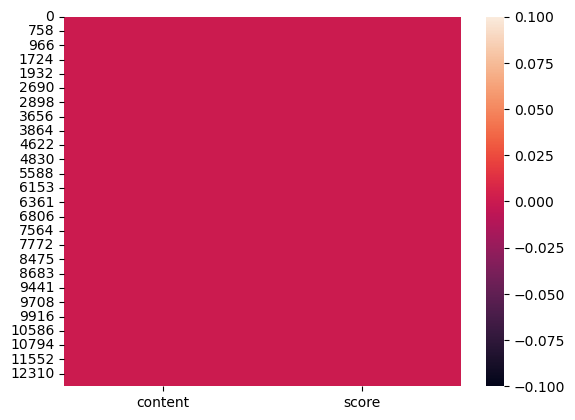

In [122]:
sns.heatmap(df.isnull())

In [123]:
df.head()

,content,score
0,I cannot open the app anymore,1
1,I have been begging for a refund from this app...,1
2,Very costly for the premium version approx Ind...,1
3,Used to keep me organized but all the 2020 UPD...,1
4,Dan Birthday Oct 28,1


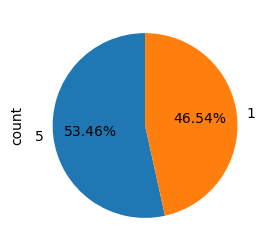

In [124]:
score_category = df['score'].value_counts().plot.pie(autopct='%.2f%%', figsize=(3, 3), startangle=90)

In [125]:
X=df['content']
y=df['score']

---
# Approach 1
**Feature Extraction:** CountVectorizer (DFM)\
**Models:** Naive Bayes, Random Forest, Decision Tree

## Feature Extraction

In [126]:
cv = CountVectorizer(stop_words='english')
X_cv = cv.fit_transform(X)

In [127]:
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X_cv,y,test_size=0.3)

## Model Training (Naive Bayes)

In [128]:
nb_cv = MultinomialNB()
nb_cv.fit(X_train_cv,y_train_cv)
y_pred_nb_cv = nb_cv.predict(X_test_cv)

## Model Training (Random Forest)

In [129]:
rf_cv = RandomForestClassifier()
rf_cv.fit(X_train_cv,y_train_cv)
y_pred_rf_cv = rf_cv.predict(X_test_cv)

## Model Training (Decision Tree)

In [130]:
dt_cv = DecisionTreeClassifier()
dt_cv.fit(X_train_cv,y_train_cv)
y_pred_dt_cv = dt_cv.predict(X_test_cv)

## Results & Notable Plots

In [131]:
print(classification_report(y_test_cv,y_pred_nb_cv)) # naive bayes

              precision    recall  f1-score   support

           1       0.89      0.86      0.88       770
           5       0.88      0.90      0.89       846

    accuracy                           0.88      1616
   macro avg       0.88      0.88      0.88      1616
weighted avg       0.88      0.88      0.88      1616



In [132]:
print(classification_report(y_test_cv,y_pred_rf_cv)) # random forest

              precision    recall  f1-score   support

           1       0.89      0.83      0.86       770
           5       0.85      0.91      0.88       846

    accuracy                           0.87      1616
   macro avg       0.87      0.87      0.87      1616
weighted avg       0.87      0.87      0.87      1616



In [133]:
print(classification_report(y_test_cv,y_pred_dt_cv)) # Decision Tree

              precision    recall  f1-score   support

           1       0.87      0.73      0.79       770
           5       0.78      0.90      0.84       846

    accuracy                           0.82      1616
   macro avg       0.83      0.81      0.82      1616
weighted avg       0.82      0.82      0.82      1616



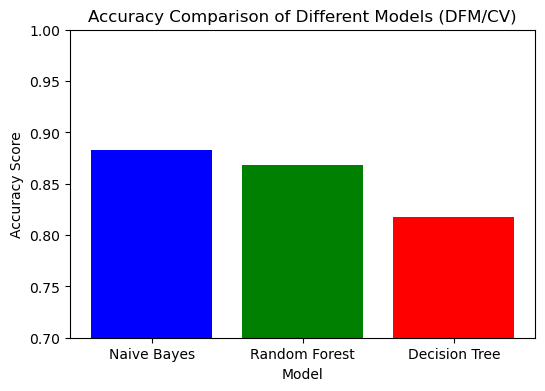

In [134]:
accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test_cv, y_pred_nb_cv),
    'Random Forest': accuracy_score(y_test_cv, y_pred_rf_cv),
    'Decision Tree': accuracy_score(y_test_cv, y_pred_dt_cv),
}

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Models (DFM/CV)')
plt.ylim(0.7, 1.0)
plt.show()


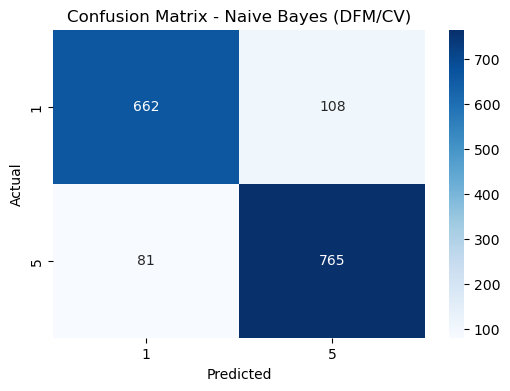

In [135]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_cv, y_pred_nb_cv), annot=True, fmt='d', cmap='Blues', xticklabels=['1', '5'], yticklabels=['1', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes (DFM/CV)')
plt.show()

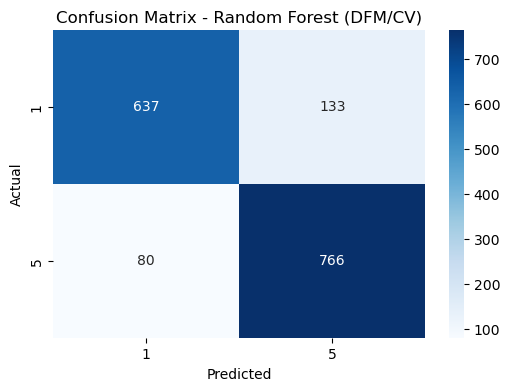

In [136]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_cv, y_pred_rf_cv), annot=True, fmt='d', cmap='Blues', xticklabels=['1', '5'], yticklabels=['1', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (DFM/CV)')
plt.show()

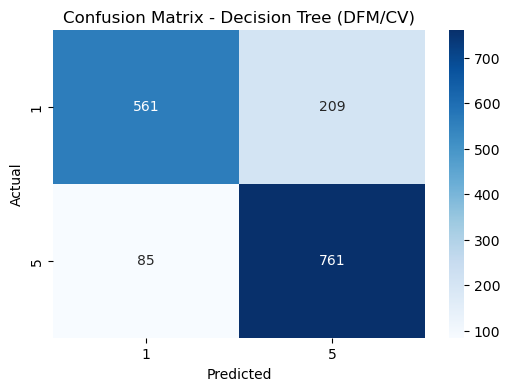

In [137]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_cv, y_pred_dt_cv), annot=True, fmt='d', cmap='Blues', xticklabels=['1', '5'], yticklabels=['1', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (DFM/CV)')
plt.show()

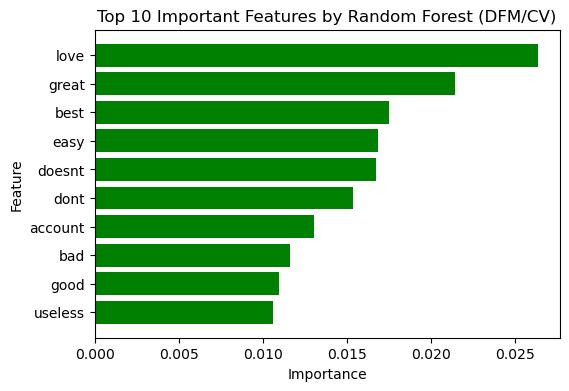

In [138]:
feature_importances = rf_cv.feature_importances_
feature_names = cv.get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6,4))
plt.barh(top_features['Feature'], top_features['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features by Random Forest (DFM/CV)')
plt.gca().invert_yaxis()
plt.show()

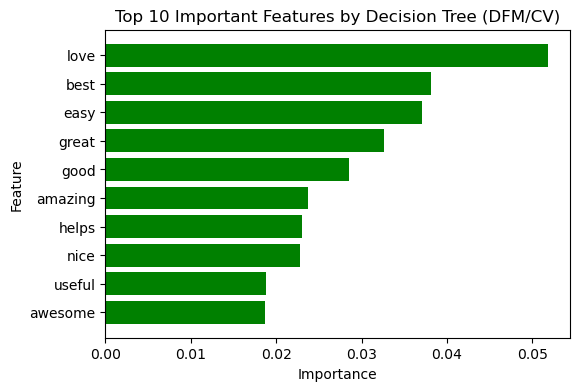

In [139]:
feature_importances = dt_cv.feature_importances_
feature_names = cv.get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6,4))
plt.barh(top_features['Feature'], top_features['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features by Decision Tree (DFM/CV)')
plt.gca().invert_yaxis()
plt.show()

---
# Approach 2
**Feature Extraction:** TF-IDF\
**Models:** Naive Bayes, Random Forest, Decision Tree

## Feature Extraction

In [140]:
tfid = TfidfVectorizer(stop_words='english')
X_tfid = tfid.fit_transform(X)

In [141]:
X_train_tfid,X_test_tfid,y_train_tfid,y_test_tfid = train_test_split(X_tfid,y,test_size=0.3)

## Model Training (Naive Bayes)

In [142]:
nb_tfid = MultinomialNB()
nb_tfid.fit(X_train_tfid,y_train_tfid)
y_pred_nb_tfid = nb_tfid.predict(X_test_tfid)

## Model Training (Random Forest)

In [143]:
rf_tfid = RandomForestClassifier()
rf_tfid.fit(X_train_tfid,y_train_tfid)
y_pred_rf_tfid = rf_tfid.predict(X_test_tfid)

## Model Training (Decision Tree)

In [144]:
dt_tfid = DecisionTreeClassifier()
dt_tfid.fit(X_train_tfid,y_train_tfid)
y_pred_dt_tfid = dt_tfid.predict(X_test_tfid)

## Results & Notable Plots

In [145]:
print(classification_report(y_test_tfid,y_pred_nb_tfid)) # naive bayes

              precision    recall  f1-score   support

           1       0.91      0.87      0.89       752
           5       0.89      0.93      0.91       864

    accuracy                           0.90      1616
   macro avg       0.90      0.90      0.90      1616
weighted avg       0.90      0.90      0.90      1616



In [146]:
print(classification_report(y_test_tfid,y_pred_rf_tfid)) # random forest

              precision    recall  f1-score   support

           1       0.89      0.83      0.86       752
           5       0.86      0.91      0.88       864

    accuracy                           0.87      1616
   macro avg       0.87      0.87      0.87      1616
weighted avg       0.87      0.87      0.87      1616



In [147]:
print(classification_report(y_test_tfid,y_pred_dt_tfid)) # decision tree

              precision    recall  f1-score   support

           1       0.84      0.78      0.81       752
           5       0.82      0.87      0.84       864

    accuracy                           0.83      1616
   macro avg       0.83      0.82      0.83      1616
weighted avg       0.83      0.83      0.83      1616



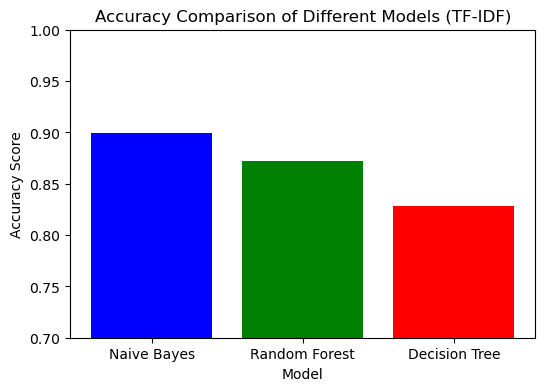

In [148]:
accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test_tfid, y_pred_nb_tfid),
    'Random Forest': accuracy_score(y_test_tfid, y_pred_rf_tfid),
    'Decision Tree': accuracy_score(y_test_tfid, y_pred_dt_tfid),
}

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Models (TF-IDF)')
plt.ylim(0.7, 1.0)
plt.show()

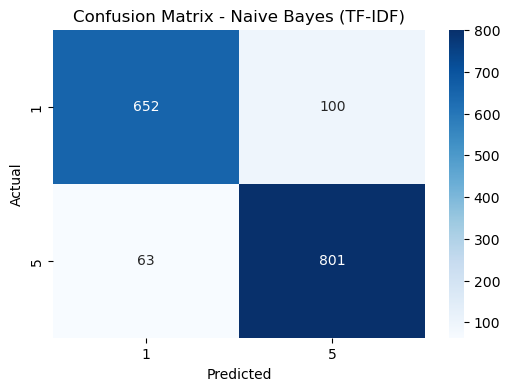

In [149]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_tfid, y_pred_nb_tfid), annot=True, fmt='d', cmap='Blues', xticklabels=['1', '5'], yticklabels=['1', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes (TF-IDF)')
plt.show()

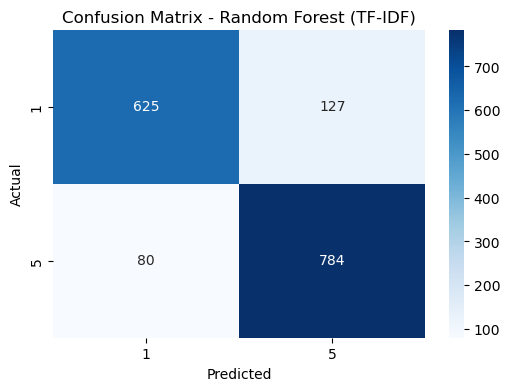

In [150]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_tfid, y_pred_rf_tfid), annot=True, fmt='d', cmap='Blues', xticklabels=['1', '5'], yticklabels=['1', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (TF-IDF)')
plt.show()

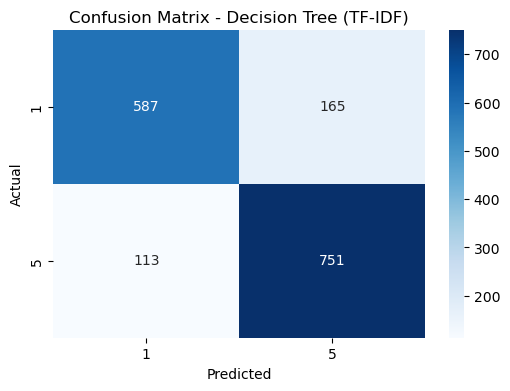

In [151]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_tfid, y_pred_dt_tfid), annot=True, fmt='d', cmap='Blues', xticklabels=['1', '5'], yticklabels=['1', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (TF-IDF)')
plt.show()

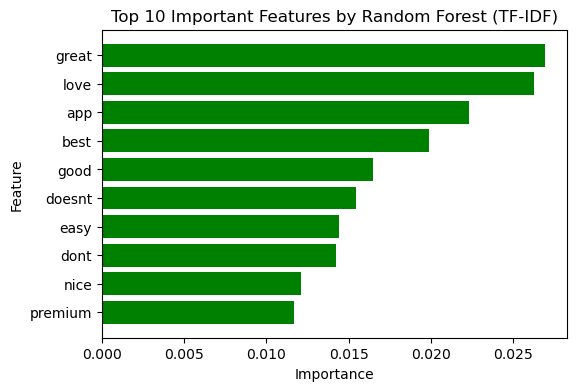

In [152]:
feature_importances = rf_tfid.feature_importances_
feature_names = tfid.get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6,4))
plt.barh(top_features['Feature'], top_features['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features by Random Forest (TF-IDF)')
plt.gca().invert_yaxis()
plt.show()

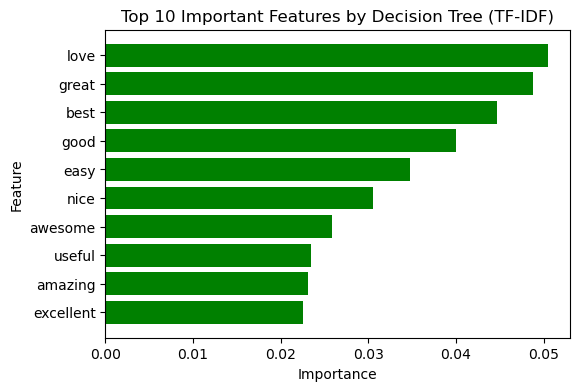

In [153]:
feature_importances = dt_tfid.feature_importances_
feature_names = tfid.get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6,4))
plt.barh(top_features['Feature'], top_features['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features by Decision Tree (TF-IDF)')
plt.gca().invert_yaxis()
plt.show()